<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/Copy_of_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

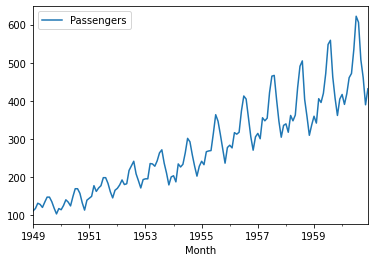

In [1]:
# dataframe opertations - pandas
import pandas as pd
import numpy as np
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
ap=pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv',index_col='Month',
                      parse_dates=True)
ap.plot()
plt.show()

# Set the value of Alpha and define m (Time Period)
m = 1
alpha = 1/(2*m)
# Set the frequency of the date time index as Monthly start as indicated by the data
ap.index.freq='MS'

In [ ]:
ap

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


# Decompose Series into Error Trend and Seasonal Component



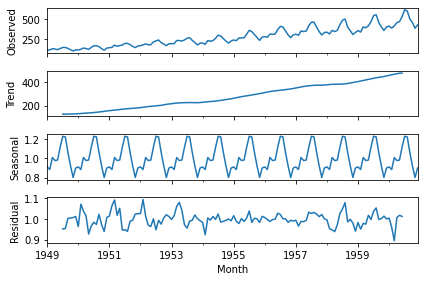

In [ ]:

decompose_result = seasonal_decompose(ap['Passengers'],model='multiplicative')
decompose_result.plot();

# Simple Moving Averages

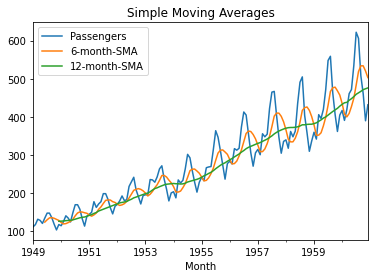

In [ ]:
ap['6-month-SMA'] = ap['Passengers'].rolling(window=6).mean()
ap['12-month-SMA'] = ap['Passengers'].rolling(window=12).mean()
ap.plot(title='Simple Moving Averages');

# Simple Exponential Smoothing

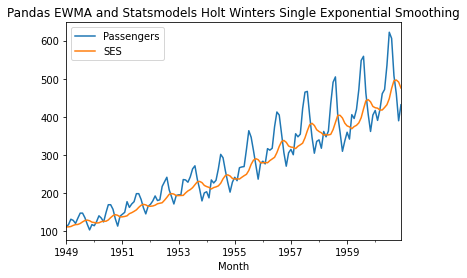

In [ ]:
span = 12
alpha = 2/(span+1)
ap['SES'] = SimpleExpSmoothing(ap['Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues
ap[['Passengers','SES']].plot(title='Pandas EWMA and Statsmodels Holt Winters Single Exponential Smoothing');

# Double Exponential Smoothing

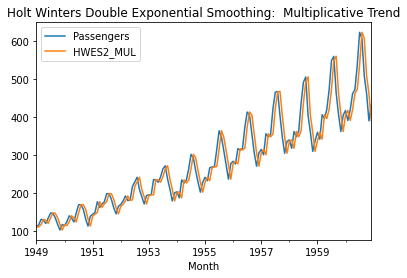

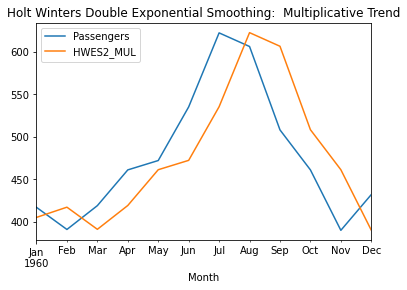

In [ ]:

ap['HWES2_MUL'] = ExponentialSmoothing(ap['Passengers'],trend='mul').fit().fittedvalues
ap[['Passengers','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing:  Multiplicative Trend')
ap[['Passengers','HWES2_MUL']][-12:].plot(title='Holt Winters Double Exponential Smoothing:  Multiplicative Trend');

# Triple Exponential Smoothing

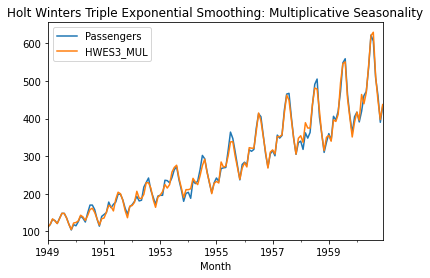

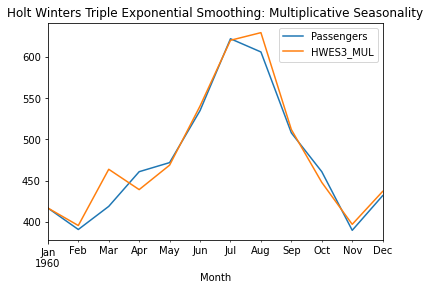

In [ ]:
ap['HWES3_MUL'] = ExponentialSmoothing(ap['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
ap[['Passengers','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Multiplicative Seasonality');
ap[['Passengers','HWES3_MUL']][-12:].plot(title='Holt Winters Triple Exponential Smoothing: Multiplicative Seasonality');

# TRAIN and TEST SPLIT

In [2]:


train = ap['Passengers'][:114]
test = ap['Passengers'][114:]
print("Full data shape is "+ str(ap.shape))
print("Train data shape is "+ str(train.shape))
print("Test data shape is "+ str(test.shape))

Full data shape is (144, 1)
Train data shape is (114,)
Test data shape is (30,)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

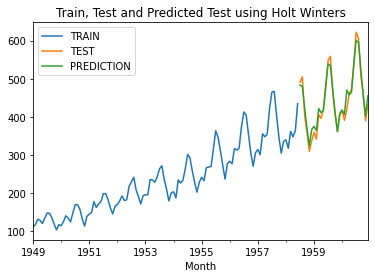

In [3]:
fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=12).fit().forecast(30).rename('HW')
train.plot(legend=True,label='TRAIN')
test.plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

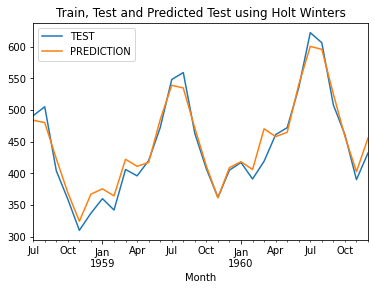

In [4]:
test.plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

In [5]:
#Evaluate forecasting Performance
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test,test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(test,test_predictions)}')
import numpy as np
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_predictions) )}')

Mean Absolute Error = 13.734190338191457
Mean Squared Error = 298.73649526699705
Mean Absolute Percentage Error = 3.229798375722036


In [6]:
!pip install tbats

     |████████████████████████████████| 43 kB 1.6 MB/s 
     |████████████████████████████████| 1.4 MB 6.4 MB/s 
     |████████████████████████████████| 9.8 MB 46.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [13]:
from tbats import TBATS
import numpy as np
estimator = TBATS(
    seasonal_periods=[12],
    use_arma_errors=True,  # shall try only models without ARMA
    use_box_cox= # will not use Box-Cox
)
model = estimator.fit(train)

In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
y_forecast = model.forecast(steps=30)
print(f'Mean Absolute Error = {mean_absolute_error(test,y_forecast)}')
print(f'Mean Squared Error = {mean_squared_error(test,y_forecast)}')
import numpy as np
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(y_forecast) )}')

Mean Absolute Error = 46.6537704255809
Mean Squared Error = 3672.1564314606067
Mean Absolute Percentage Error = 9.877360046509164
